<a href="https://colab.research.google.com/github/rilschultz/CS167Notes/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Riley Schultz

Proposed Points (23 out of 25):

I feel like I worked well with the data but could have done more in my models. With the couple graphs it was good but I was not sure where to get others in the work. 

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The Problem I am trying to solve is a classification problem given an image of a chess piece allowing it to give a response to which piece it is by giving it data and labeling the train data. The dataset I used is from kaggle and has over 500 images of chess pieces.

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

When I got the dataset there were folders seperated by piece, to make it look more like the wildlife dataset we worked with I wanted to seperate those folders more into train and test folders for each piece, by seeing how many of each image there was in each folder I then seperated it 80% train 20% test for each folder. This data had a high usabliity rating on kaggle and the files were easily accessable when I went to look into the dataset. I also did do a quick run through of the data to make sure no images were in the wrong spot.

*your answer here*

In [ ]:
# load and prepare your data here
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
 
def load_images_from_path(path, label):
    images, labels = [], []
 
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))
         
    return images, labels
 
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
 
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
 
x_train, y_train, x_test, y_test = [], [], [], []

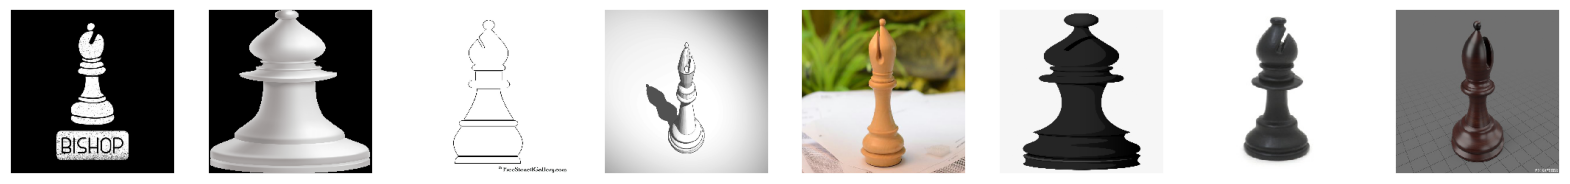

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Chess/Bishop', 0)
show_images(images)
    
x_train += images
y_train += labels

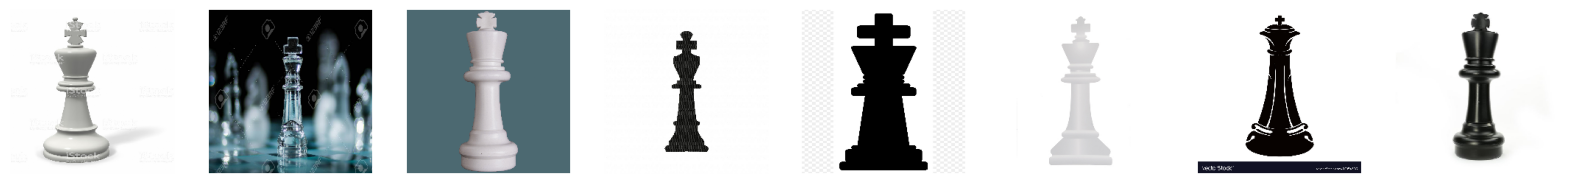

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Chess/King', 1)
show_images(images)
    
x_train += images
y_train += labels

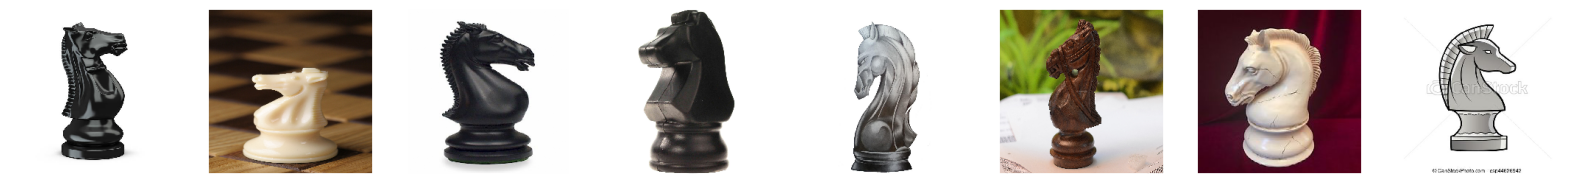

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Chess/Knight', 2)
show_images(images)
    
x_train += images
y_train += labels

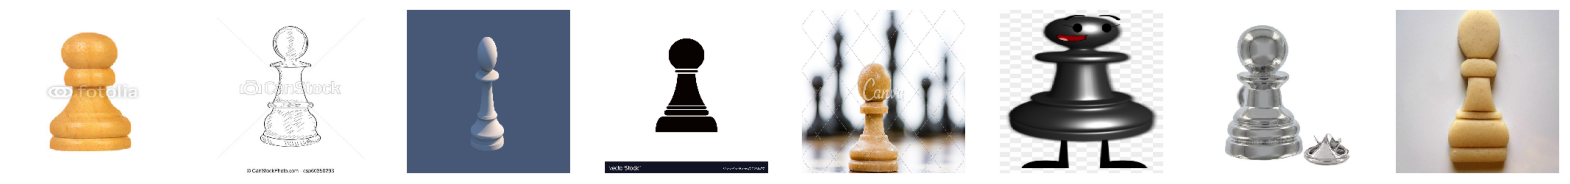

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Chess/Pawn', 3)
show_images(images)
    
x_train += images
y_train += labels

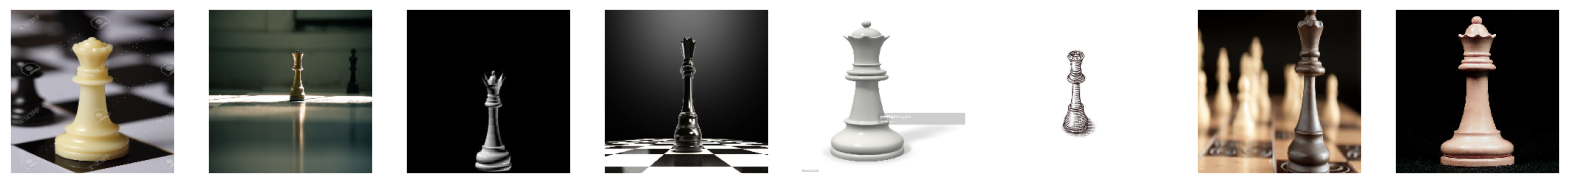

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Chess/Queen', 4)
show_images(images)
    
x_train += images
y_train += labels

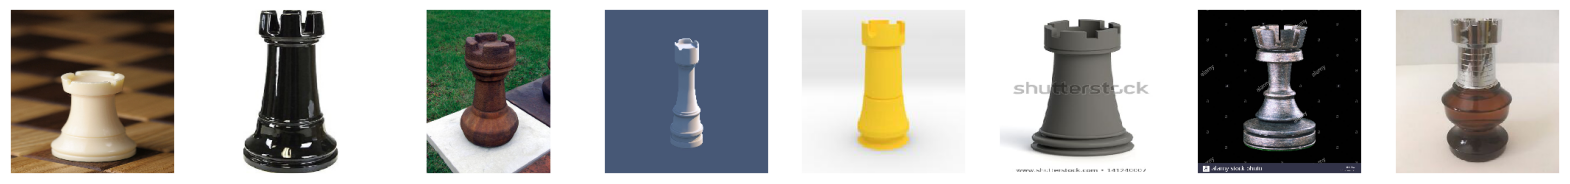

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Chess/Rook', 5)
show_images(images)
    
x_train += images
y_train += labels

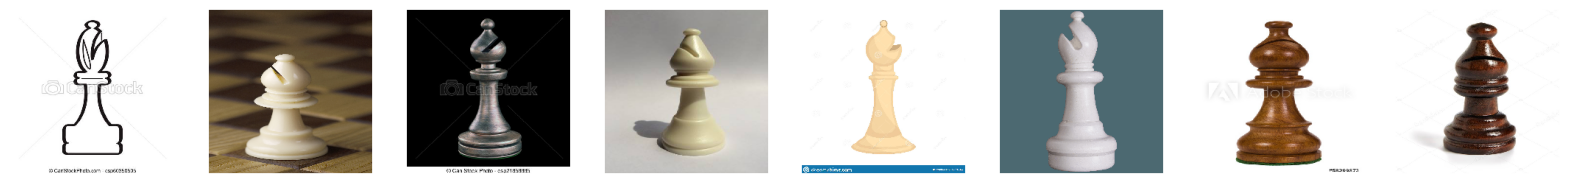

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Chess/BishopTest', 0)
show_images(images)
    
x_test += images
y_test += labels

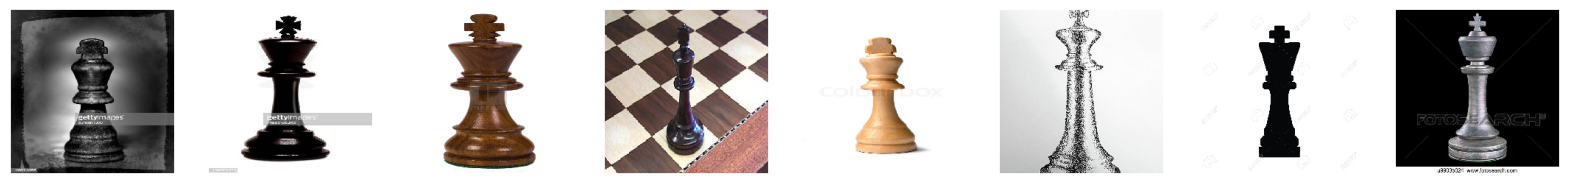

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Chess/KingTest', 1)
show_images(images)
    
x_test += images
y_test += labels

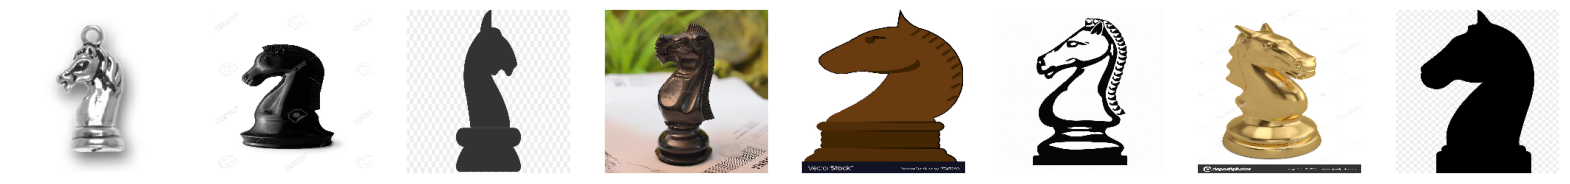

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Chess/KnightTest', 2)
show_images(images)
    
x_test += images
y_test += labels

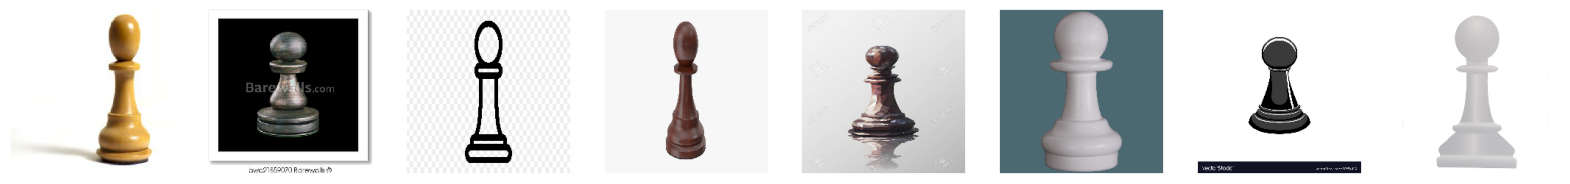

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Chess/PawnTest', 3)
show_images(images)
    
x_test += images
y_test += labels

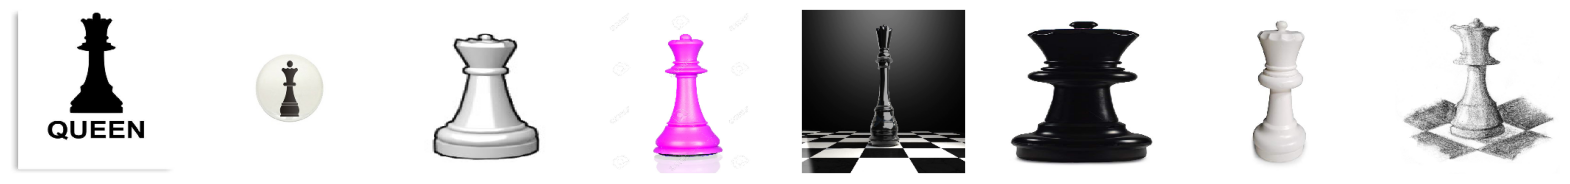

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Chess/QueenTest', 4)
show_images(images)
    
x_test += images
y_test += labels

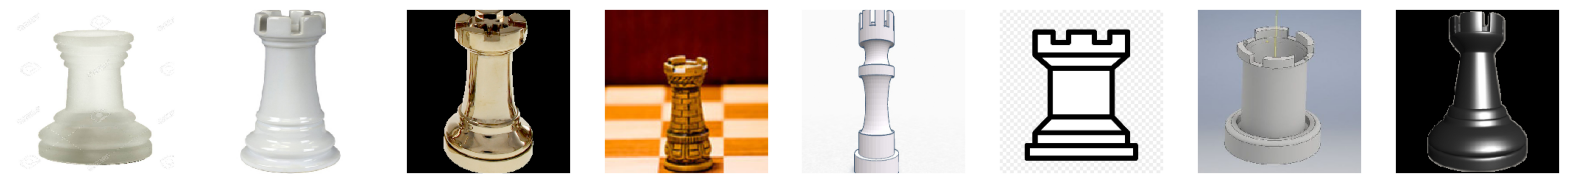

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Chess/RookTest', 5)
show_images(images)
    
x_test += images
y_test += labels

# 3. Research

Put your code and your experiments here.

In [ ]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.
import numpy as np
 
x_train = np.array(x_train) / 255 # normalize pixel values
x_test = np.array(x_test) / 255

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

Model: "sequential_34"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_156 (Conv2D)                (None, 222, 222, 32)            896         
                                                                                
 max_pooling2d_146 (MaxPooling2D)   (None, 111, 111, 32)            0           
                                                                                
 conv2d_157 (Conv2D)                (None, 109, 109, 64)            18496       
                                                                                
 max_pooling2d_147 (MaxPooling2D)   (None, 54, 54, 64)              0           
                                                                                
 conv2d_158 (Conv2D)                (None, 52, 52, 64)              36928       
                                                                                
 max_

In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=4, epochs=20)

Epoch 1/20
112/112 [==============================] - 4s 13ms/step - loss: 1.7980 - accuracy: 0.1843 - val_loss: 1.7851 - val_accuracy: 0.1802
Epoch 2/20
112/112 [==============================] - 1s 11ms/step - loss: 1.8008 - accuracy: 0.1820 - val_loss: 1.7857 - val_accuracy: 0.1802
Epoch 3/20
112/112 [==============================] - 1s 12ms/step - loss: 1.7541 - accuracy: 0.2270 - val_loss: 1.6962 - val_accuracy: 0.2793
Epoch 4/20
112/112 [==============================] - 1s 12ms/step - loss: 1.5544 - accuracy: 0.3843 - val_loss: 1.5727 - val_accuracy: 0.3423
Epoch 5/20
112/112 [==============================] - 1s 11ms/step - loss: 1.2885 - accuracy: 0.5101 - val_loss: 1.5610 - val_accuracy: 0.5405
Epoch 6/20
112/112 [==============================] - 1s 9ms/step - loss: 1.0540 - accuracy: 0.6135 - val_loss: 1.4607 - val_accuracy: 0.5045
Epoch 7/20
112/112 [==============================] - 1s 9ms/step - loss: 0.8560 - accuracy: 0.6854 - val_loss: 1.5676 - val_accuracy: 0.4775
E

[]

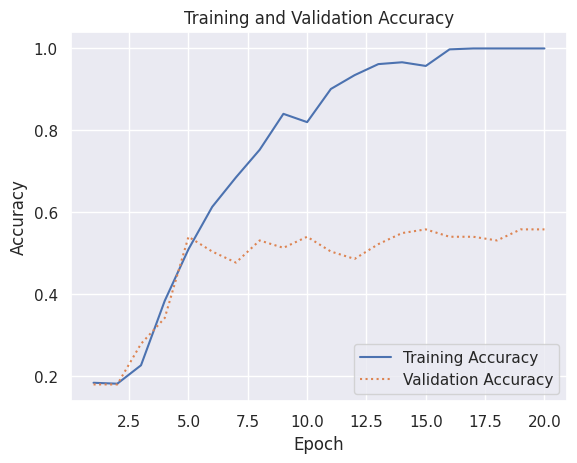

In [ ]:
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), activation='relu', input_shape=(224, 224, 3)))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(6, activation='softmax'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary(line_length=80)

Model: "sequential_35"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_160 (Conv2D)                (None, 220, 220, 32)            2432        
                                                                                
 max_pooling2d_151 (MaxPooling2D)   (None, 110, 110, 32)            0           
                                                                                
 conv2d_161 (Conv2D)                (None, 108, 108, 64)            18496       
                                                                                
 max_pooling2d_152 (MaxPooling2D)   (None, 54, 54, 64)              0           
                                                                                
 conv2d_162 (Conv2D)                (None, 52, 52, 64)              36928       
                                                                                
 max_

In [ ]:
hist2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=30)

Epoch 1/30
45/45 [==============================] - 4s 32ms/step - loss: 1.7936 - accuracy: 0.1685 - val_loss: 1.7850 - val_accuracy: 0.1892
Epoch 2/30
45/45 [==============================] - 1s 22ms/step - loss: 1.7875 - accuracy: 0.1730 - val_loss: 1.7871 - val_accuracy: 0.1892
Epoch 3/30
45/45 [==============================] - 1s 22ms/step - loss: 1.7892 - accuracy: 0.1618 - val_loss: 1.7858 - val_accuracy: 0.1892
Epoch 4/30
45/45 [==============================] - 1s 23ms/step - loss: 1.7852 - accuracy: 0.1753 - val_loss: 1.7848 - val_accuracy: 0.1892
Epoch 5/30
45/45 [==============================] - 1s 20ms/step - loss: 1.7838 - accuracy: 0.1910 - val_loss: 1.7846 - val_accuracy: 0.1892
Epoch 6/30
45/45 [==============================] - 1s 19ms/step - loss: 1.7842 - accuracy: 0.1910 - val_loss: 1.7850 - val_accuracy: 0.1892
Epoch 7/30
45/45 [==============================] - 1s 21ms/step - loss: 1.7838 - accuracy: 0.1978 - val_loss: 1.7854 - val_accuracy: 0.1892
Epoch 8/30
45

[]

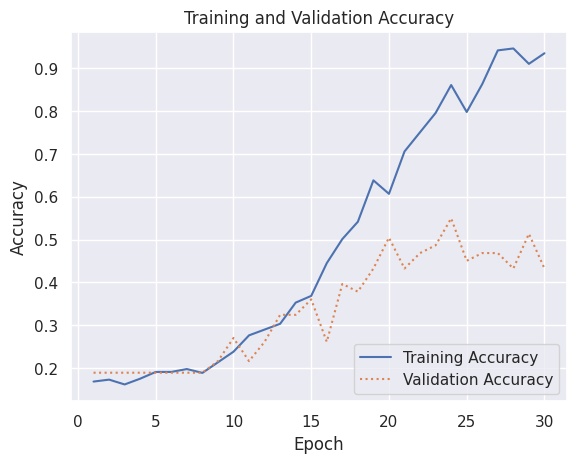

In [ ]:
sns.set()

acc2 = hist2.history['accuracy']
val_acc2 = hist2.history['val_accuracy']
epochs = range(1, len(acc2) + 1)
 
plt.plot(epochs, acc2, '-', label='Training Accuracy')
plt.plot(epochs, val_acc2, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

After doing a CNN I will now choose a different method to predict images

Next I will use a Support Vector Machine to help predict the images

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

print('Original shapes:')
print('Training data:', x_train.shape)
print('Testing data:', x_test.shape)

# Reshape the training and testing data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print('Reshaped shapes:')
print('Training data:', x_train.shape)
print('Testing data:', x_test.shape)


Original shapes:
Training data: (445, 224, 224, 3)
Testing data: (111, 224, 224, 3)
Reshaped shapes:
Training data: (445, 150528)
Testing data: (111, 150528)


In [ ]:
model3 = svm.SVC(kernel='linear', C = 3)

# Train the SVM model on the training data
model3.fit(x_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = model3.predict(x_test)

# Evaluate the performance of the model by calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


In [ ]:
print(y_pred, y_test)

[3 5 5 1 0 0 0 0 0 2 0 2 0 0 0 3 4 4 1 0 1 0 1 0 4 1 4 4 3 0 4 3 5 0 2 3 2
 2 1 2 2 5 3 4 4 1 2 2 1 2 3 2 1 2 5 2 0 3 3 1 3 4 3 2 5 5 5 2 2 4 1 5 4 3
 3 5 3 5 4 1 0 4 4 2 2 3 1 0 2 4 1 3 5 1 1 4 0 0 2 5 3 3 2 4 2 1 1 5 0 5 3] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [ ]:
listone = [3, 5, 5, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 4, 4, 1, 0, 1, 0, 1, 0, 4, 1, 4, 4, 3, 0, 4, 3, 5, 0, 2, 3, 2, 2, 1, 2, 2, 5, 3, 4, 4, 1, 2, 2, 1, 2, 3, 2, 1, 2, 5, 2, 0, 3, 3, 1, 3, 4, 3, 2, 5, 5, 5, 2, 2, 4, 1, 5, 4, 3, 3, 5, 3, 5, 4, 1, 0, 4, 4, 2, 2, 3, 1, 0, 2, 4, 1, 3, 5, 1, 1, 4, 0, 0, 2, 5, 3, 3, 2, 4, 2, 1, 1, 5, 0, 5, 3]
listtwo = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
count = 0
for i in range(len(listone)):
  if listone[i] == listtwo[i]:
    count += 1
print(count)
print(len(listone))

##9, 4, 10, 6, 4, 4
#17, 16, 21, 21, 16, 20 

37
111


#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

After I adjusted some of the areas of the CNN such as removing a couple layers I was able to get the accuracy up to 100% this not only learned the data very well but it also had a consistant validation accuracy, before doing this the highest accuracy was a 98, still very high and accurate for accessing which piece was what. I also created a second model with more layers than the class example and it did worse, but I say it was getting better so I added more epochs and it ended up getting to the level of the first model but it did take longer making me realize that the first model was the best.

Looking into other models that I could predict pictures with I used a SVM, this was a lot less accurate and stayed arounf 33% as I changed things such as C value. I had it print predicted values and actual to see which ones it was getting right and wrong more. The best predicted piece was the knight while the worse was the rook. King and Queen performed the same which is expected considering I feel they are the most similar looking pieces.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

Some fo the bumps in the road came from looking into some models I could use beyond CNN, I wanted to try out some other methods and it worked out that I could use SVM and I needed to reshape the data to make it work which I needed to look up online for some example code to use. Overall this data set was fun to work with and see run, I would like to maybe try assessing it with more nueral networks to increase validation in the future. This project was fun and allowed me to use a new form of model for image processing than a CNN that was cool to see, and especcialy that it did so much worse proving that CNN is ulitimatly the superior model for images.